<a href="https://colab.research.google.com/github/HC-JEONG/Introduction_to_Machine_Learning_with_Python/blob/master/Ch2.3.3%20Linear%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.3.3 선형 모델

> 선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행한다.



### 회귀의 선형 모델

일반화 된 예측 함수는 다음과 같다.
> y=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b

> x[0]부터 x[p]까지는 하나의 개체에 대한 특성을 나타내며 (특성의 개수는 p+1), w와 b는 모델이 학습할 파라미터이다. **예측값**은 입력 특성에 w의 각 가중치를 곱해서 더한 가중치의 합으로 볼 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz
from IPython.display import display
from sklearn.pipeline import make_pipeline
from google.colab import files
import io

!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fm._rebuild()

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=407a2ab3d691a4bdea13e898ef6e70e3e37864e4dc44bbc234753d455a7e691d
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Selecting previously unselected package fonts-nanum.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic Eco


w[0]: 0.393906  b: -0.031804


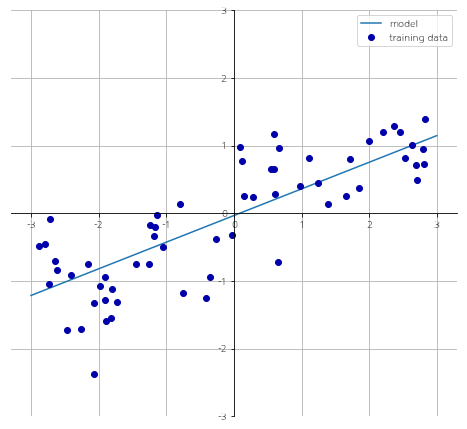

In [2]:
# 1차원 wave dataset으로 파라미터 w[0]와 b를 직선처럼 되도록 학습

mglearn.plots.plot_linear_regression_wave()

> 특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 선형 함수로 모델링 할 수 있다.


### 선형 회귀(최소제곱법)

선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘이다. **선형 회귀**는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.

> 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법또한 없다.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr=LinearRegression().fit(X_train, y_train)

> 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있다.



*   intercept_ 속성은 항상 실수(float) 값 하나다.
*   coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열이다.



In [5]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


> scikit-learn은 training set에서 유도된 속성은 항상 끝에 밑줄을 붙인다.

In [6]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


> R-squared가 0.6x대로 비교적 낮으면서 training set과 test set의 R-squared가 매우 비슷하면 underfitting으로 판단할 수 있다.

In [0]:
# BostonHousing data set 가져와서 선형회귀
X, y=mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [8]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


> training set의 R-squared는 높으나 test set의 R-squared는 낮다. 이는 모델이 **overfitting** 됐다는 신호다.

### Ridge Regression

> 리지 회귀에서의 가중치(w) 선택은 training set을 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적이 있다. **가중치의 절댓값을 가능한 한 작게** 만드는 것이다. 이렇게 함으로서 특성이 출력에 주는 영향을 최소한으로 만드는 데 이런 제약을  **규제(regularization)**라고 한다. regularization이란 overfitting이 되지 않도록 모델을 강제로 제한한다.

In [9]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


Ridge 모델의 training set의 R-squared가 LinearRegression보다 낮지만 test set의 R-squared는 더 높다. 즉, overfitting이 적어지면서 더 일반화된 모델이 된다.

> **관심 있는 것은 test set에 대한 성능**이므로 LinearRegression보다 Ridge 모델을 선택해야한다.

> Ridge는 alpha 매개변수로 training set의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있다. 최적의 alpha 값은 사용하는 dataset에 따라 다르다.

In [10]:
#ridge regression에서 alpha값을 10으로 설정
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [11]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


> alpha 값이 클수록 제약을 크게 주는 것이므로, alpha 값이 클수록 coef_의 절댓값은 작다.

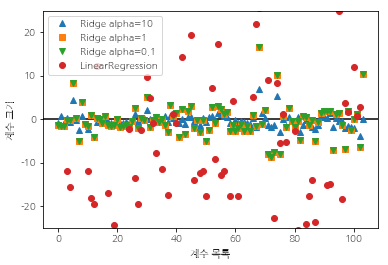

In [12]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

> regularization의 효과를 이해하는 다른 방법은 alpha 값을 고정하고 training set의 크기를 변화시켜 보는 것이다.

데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(learning curve)라고 한다.

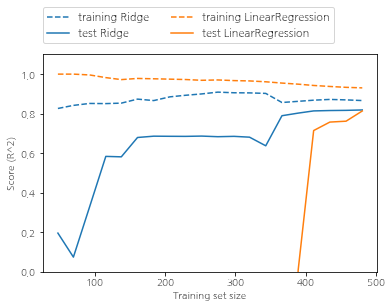

In [13]:
# BostonHousing data의 LinearRegression과 Ridge(alpha=1)에 대한 learning curve
mglearn.plots.plot_ridge_n_samples()

> dataset의 크기가 작을때는 Ridge가 R-squared가 높으나 데이터를 충분히 주면 규제 항은 덜 중요해져서 Ridge와 LinearRegression의 성능이 거의 같아진다.

> 데이터가 많아질수록 모델이 데이터를 기억하거나 overfitting하기 어려워져서 LinearRegression의 training data의 R-squared가 낮아진다.

### Lasso Regression

> Lasso는 L1 규제의 결과로 어떤 계수는 정말 0이 되므로 **완전히 제외되는 특성이 생긴다.** **특성 선택(feature selection)**이 자동으로 이뤄진다고 볼 수 있는데, 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

In [14]:
# BostonHousing에 Lasso 적용
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [15]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


> alpha 값이 낮으몬 모델의 복잡도는 증가하기 때문에 성능이 좋아진다. 그런데 사용한 특성은 104개 중 33개뿐이어서 모델을 분석하기가 더 쉽다.

> 그러나 alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

In [16]:
lasso00001=Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))
print(lasso.n_iter_)

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96
34


Text(0, 0.5, '계수 크기')

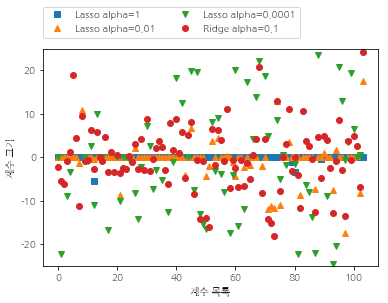

In [17]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

> 실제 두 모델 중 보통은 Ridge Regression을 선호한다. 그러나 특성이 많고 그중 일부분만 중요하거나 분석하기 쉬운 모델을 원한다면 Lasso가 더 좋은 선택일 수 있다.

### 분류용 선형 모델

> 선형 모델을 이진 분류(binary classification)에 적용하는 것으로 종속변수 값을 0과 비교해서 0보다 작으면 클래스를 -1로, 0보다 크면 클래스를 1로 예측하는 것이다. 가장 알려진 선형 분류 알고리즘은 로지스틱 회귀(logistic regression)과 서포트 벡터 머신(support vector machine)이다.



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


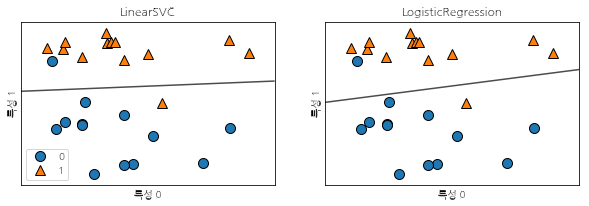

In [18]:
# forge dataset을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타냄.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y= mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

> LogisticRegression과 LinearSVC에서 regularization의 강도를 결정하는 매개변수는 C다. C가 높아지면 regularization은 감소한다. 즉 C 값이 높아지면 training set에 가능한 최대로 맞추려 하고 C 값이 낮아지면 coefficient vector(w)는 0에 가까워진다.

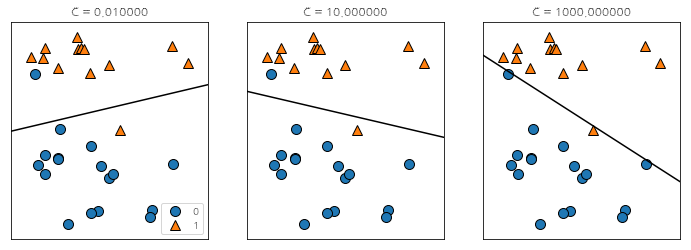

In [19]:
mglearn.plots.plot_linear_svc_regularization()

위 그림은 C값이 높아질수록 결정경계가 overfitting되는 모습을 보여준다.

In [20]:
# 유방암 데이터셋을 이용해서 LogisticRegression 확인
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train, y_train) # 기본값은 C=1이 적용된다.
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# C=100
logreg100=LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# C=0.01
logreg001=LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


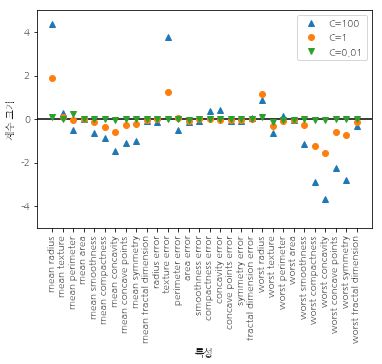

In [23]:
# C 값에 따른 모델의 coefficient 변화
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

> regularization의 penalty를 L2-norm이 기본값이지만, L1-norm으로 할 수도 있다.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


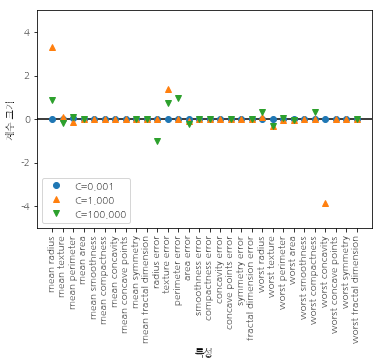

In [24]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1=LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

> 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 기법은 일대다(one-vs.-rest) 방법이다.

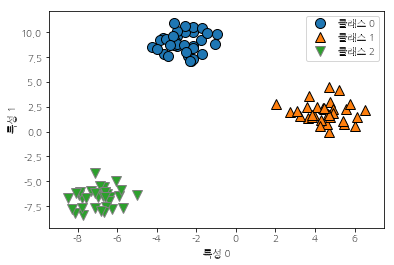

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [26]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


> coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값(이 데이터셋에서는 두 개)를 가지고 있다.

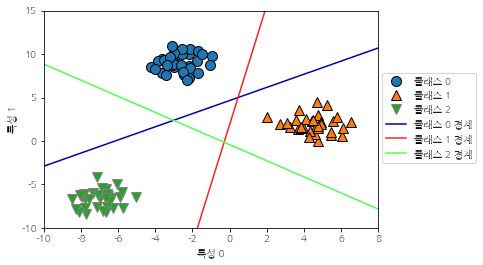

In [27]:
#시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01,0.3))

> 만약 개체가 중앙의 삼각형 영역에 있다면 그 개체는 가장 가까운 직선의 클래스가 될 것이다.

Text(0, 0.5, '특성 1')

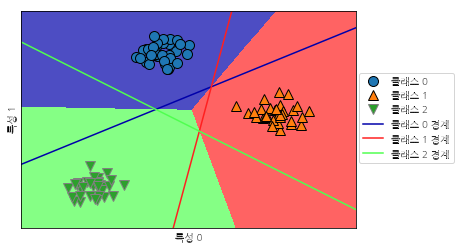

In [28]:
#2차원 평면의 모든 포인트에 대한 예측 결과
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 장단점과 매개변수

*   선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C이다.
*   alpha는 값이 클수록, C는 작을수록 모델이 단순해진다.
*   C와 alpha는 로그 스케일로 최적치를 정한다.
*   기본적으로 L2-norm regularization을 이용하며 중요한 특성이 별로 없다고 생각되면 L1-norm을 사용한다.
*   선형 모델은 학습 속도가 빠르고 예측도 빠르다.
*   coefficients가 왜 그런지 명확하지 않을 수 있다.
*   샘플에 비해 특성이 많을 때 잘 작동한다.
*   매우 큰 데이터셋에도 선형 모델을 사용한다.

In [29]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다.
logreg=LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
logreg=LogisticRegression()
y_pred=logreg.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# 모델의 객체를 만들고, 훈련하고, 예측하는 일을 모두 한 줄에 쓸 수 있다.
y_pred=LogisticRegression().fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
